In [3]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
idate = '20200530'
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_wavelet_BT_'+idate+'_*.nc'
origfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_108_BT_'+idate+'_*.nc'

In [5]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [6]:
data

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667, time: 95)
Coordinates:
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * time     (time) datetime64[ns] 2020-05-30 ... 2020-05-30T23:45:00
Data variables:
    power    (time, lat, lon) float64 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
    BT       (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [7]:
tstep_old = data.isel(time=-24).load() #-24

In [8]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667)
Coordinates:
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
    time     datetime64[ns] 2020-05-30T18:00:00
Data variables:
    power    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BT       (lat, lon) int16 -3380 -2768 -2162 -1794 ... -1646 -1246 -564 442
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

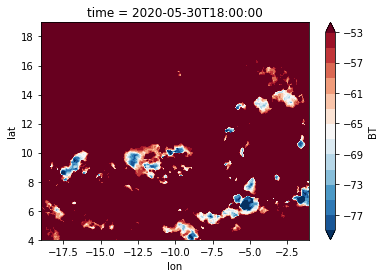

In [9]:
(tstep_old['BT']/100).plot.contourf(levels=np.arange(-79,-52,2))

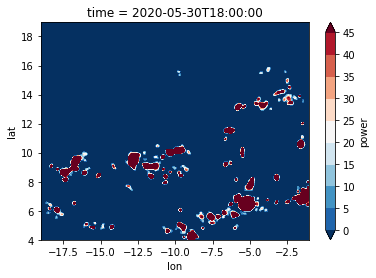

In [10]:
tstep_old['power'].plot.contourf(levels=np.arange(0,50,5))

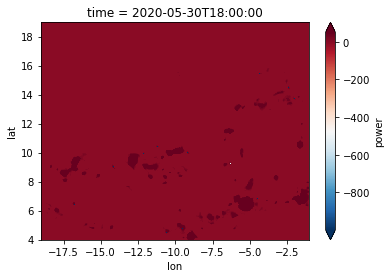

In [11]:
tstep_old['power'].plot.pcolormesh(vmin=-999, vmax=50, cmap='RdBu_r')

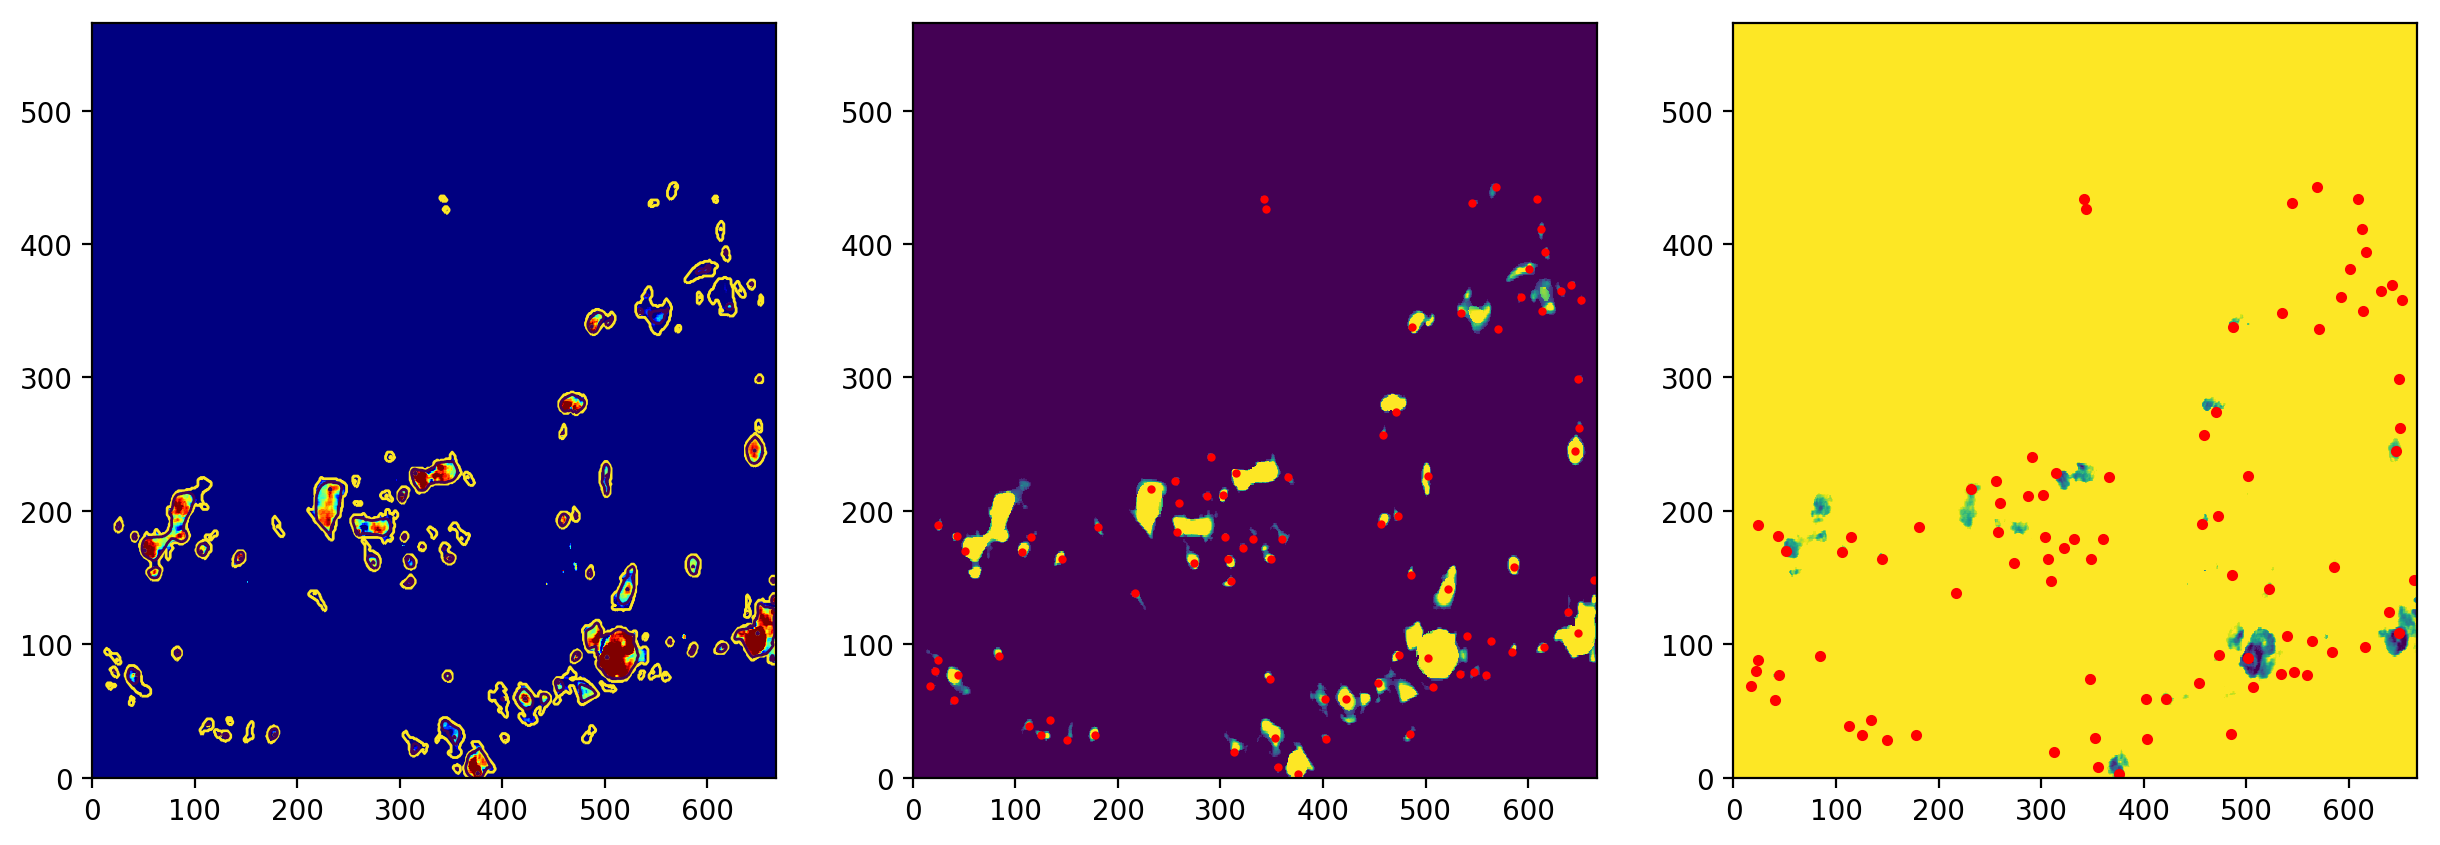

In [12]:
lon, lat = np.meshgrid(tstep_old['lon'], tstep_old['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep_old['BT']/100, vmin=-80, vmax=-70, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[0,50], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep_old['BT']/100, vmax=-75, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    

#f.savefig('/home/ck/DIR/cornkle/data/test/old_cores'+tag+'.png')


In [13]:
#tstep_old = xr.open_mfdataset(origfile, decode_times=False)
meteosat_data = tstep_old['BT'].values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
outt, nogood, t_thresh_size, t_thresh_cut, pix_nb, area_img = utils.filter_img(meteosat_data, 3)

outmin -90.46 35.04


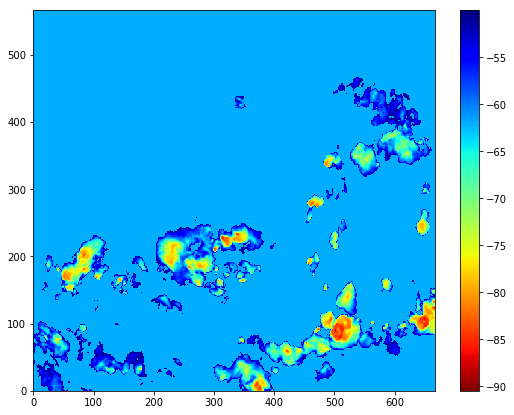

In [14]:
plt.figure(figsize=(9,7))
plt.pcolormesh(outt, cmap='jet_r')
plt.colorbar()

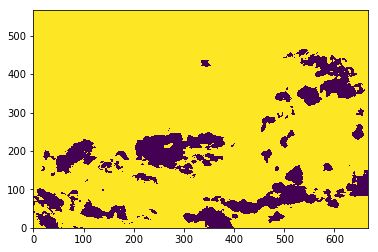

In [15]:
plt.pcolormesh(nogood)

In [16]:
wav = wavelet.waveletT(outt, dataset='METEOSAT3K_veraLS')

In [17]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

In [18]:
wav['scales']

array([ 12.        ,  18.1885988 ,  27.56876052,  41.78642704,
        63.33637972,  96.        , 145.50879038])

In [19]:
wav['power'].shape

(7, 566, 667)

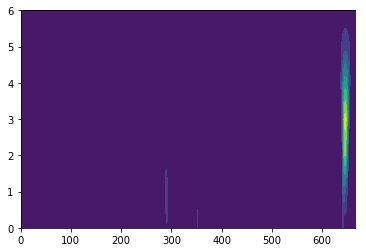

In [20]:
plt.contourf(wav['power'][:,240,:])

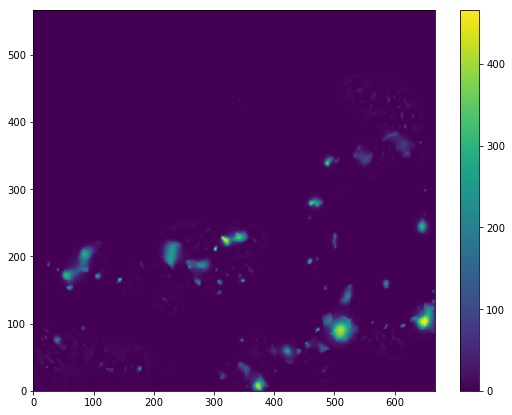

In [21]:
plt.figure(figsize=(9,7))
plt.pcolormesh(wav['power'].sum(axis=0))
plt.colorbar()

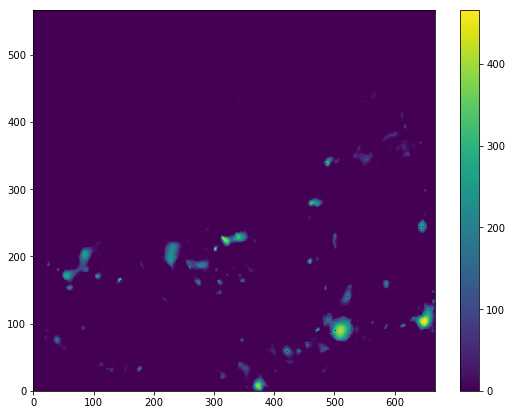

In [22]:
plt.figure(figsize=(9,7))
plt.pcolormesh(tstep_old['power'], vmin=0)
plt.colorbar()

In [23]:
power_msg = utils.find_dominant_power(wav, outt, nogood, area_img,3)

146.0
96.0
63.0
42.0
28.0
18.0
12.0


In [24]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

In [25]:
prcp = xr.open_dataset('/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/GPM_granules/3B-HHR.MS.MRG.3IMERG.20200530-S180000-E182959.1080.V06B.HDF5', group='/Grid/')

In [26]:
prcp = prcp['precipitationCal'].squeeze()

In [27]:
pbox = prcp.sel(lat=slice(np.min(latitudes), np.max(latitudes)), lon=slice(np.min(longitudes),np.max(longitudes)))

In [28]:
pbox

<xarray.DataArray 'precipitationCal' (lon: 179, lat: 150)>
array([[0.42    , 1.17    , 1.17    , ..., 0.      , 0.      , 0.      ],
       [0.38    , 1.6     , 3.23    , ..., 0.      , 0.      , 0.      ],
       [0.38    , 1.51    , 3.21    , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.217046, 0.100898, 0.088603, ..., 0.      , 0.      , 0.      ],
       [0.210898, 0.100898, 0.328363, ..., 0.      , 0.      , 0.      ]],
      dtype=float32)
Coordinates:
    time     object 2020-05-30 18:00:00
  * lon      (lon) float32 -18.95 -18.85 -18.75 -18.65 ... -1.35 -1.25 -1.15
  * lat      (lat) float32 4.05 4.15 4.25 4.35 4.45 ... 18.65 18.75 18.85 18.95
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9

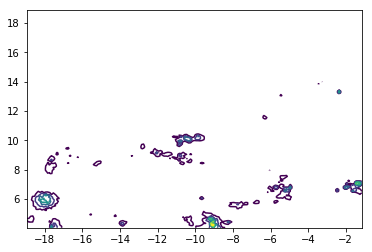

In [171]:
plt.contour(pbox.lon, pbox.lat, pbox.T)

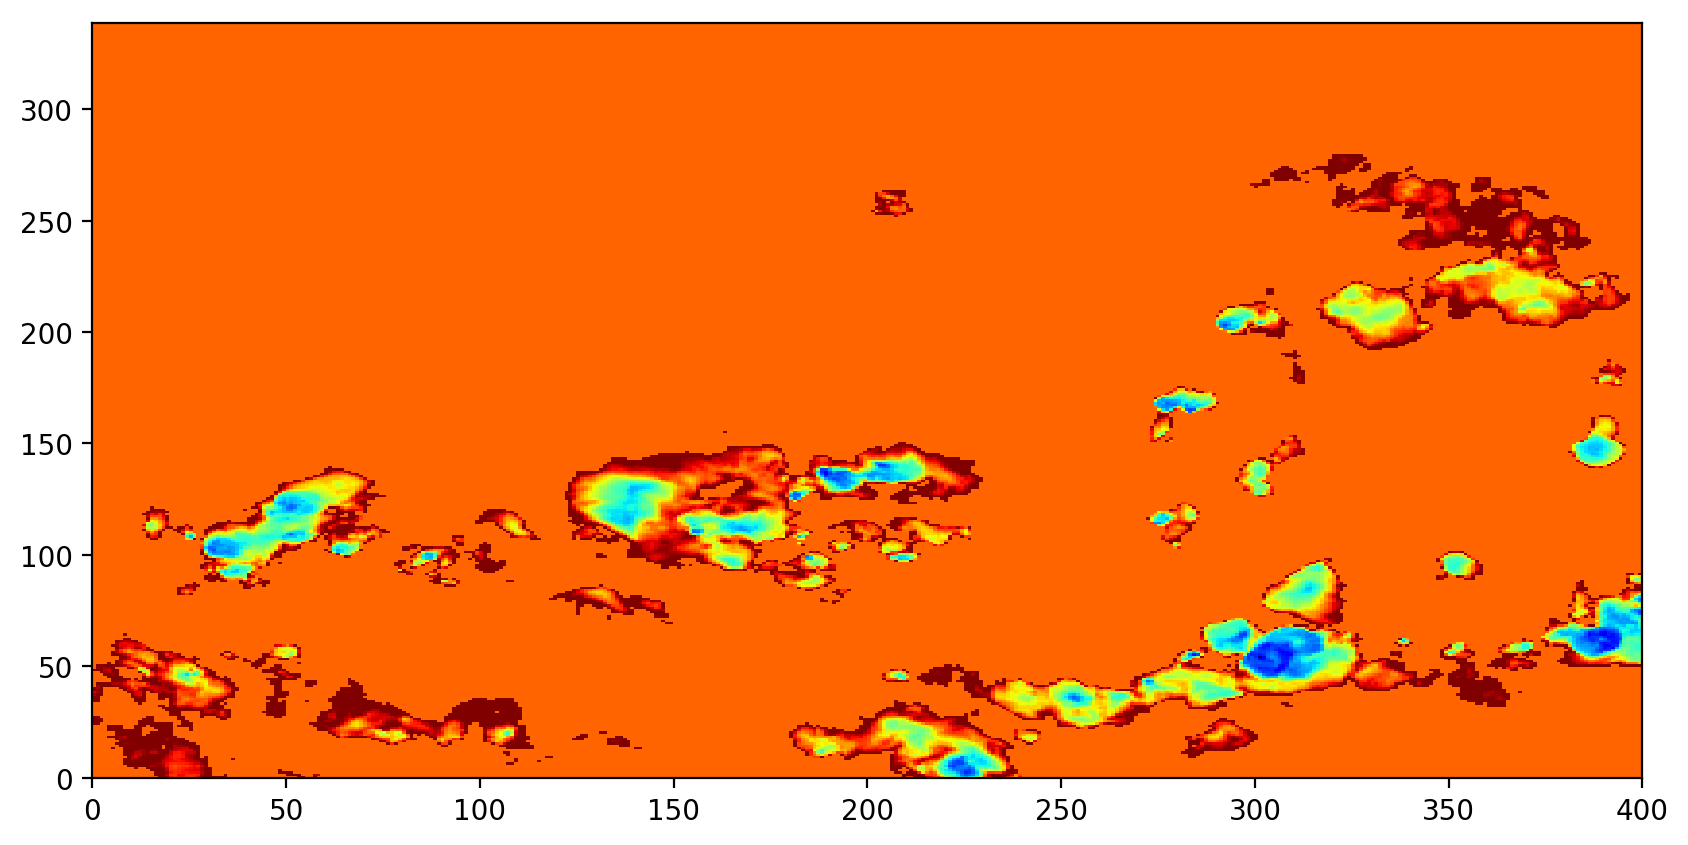

In [172]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(outt, vmax=-55, cmap='jet')

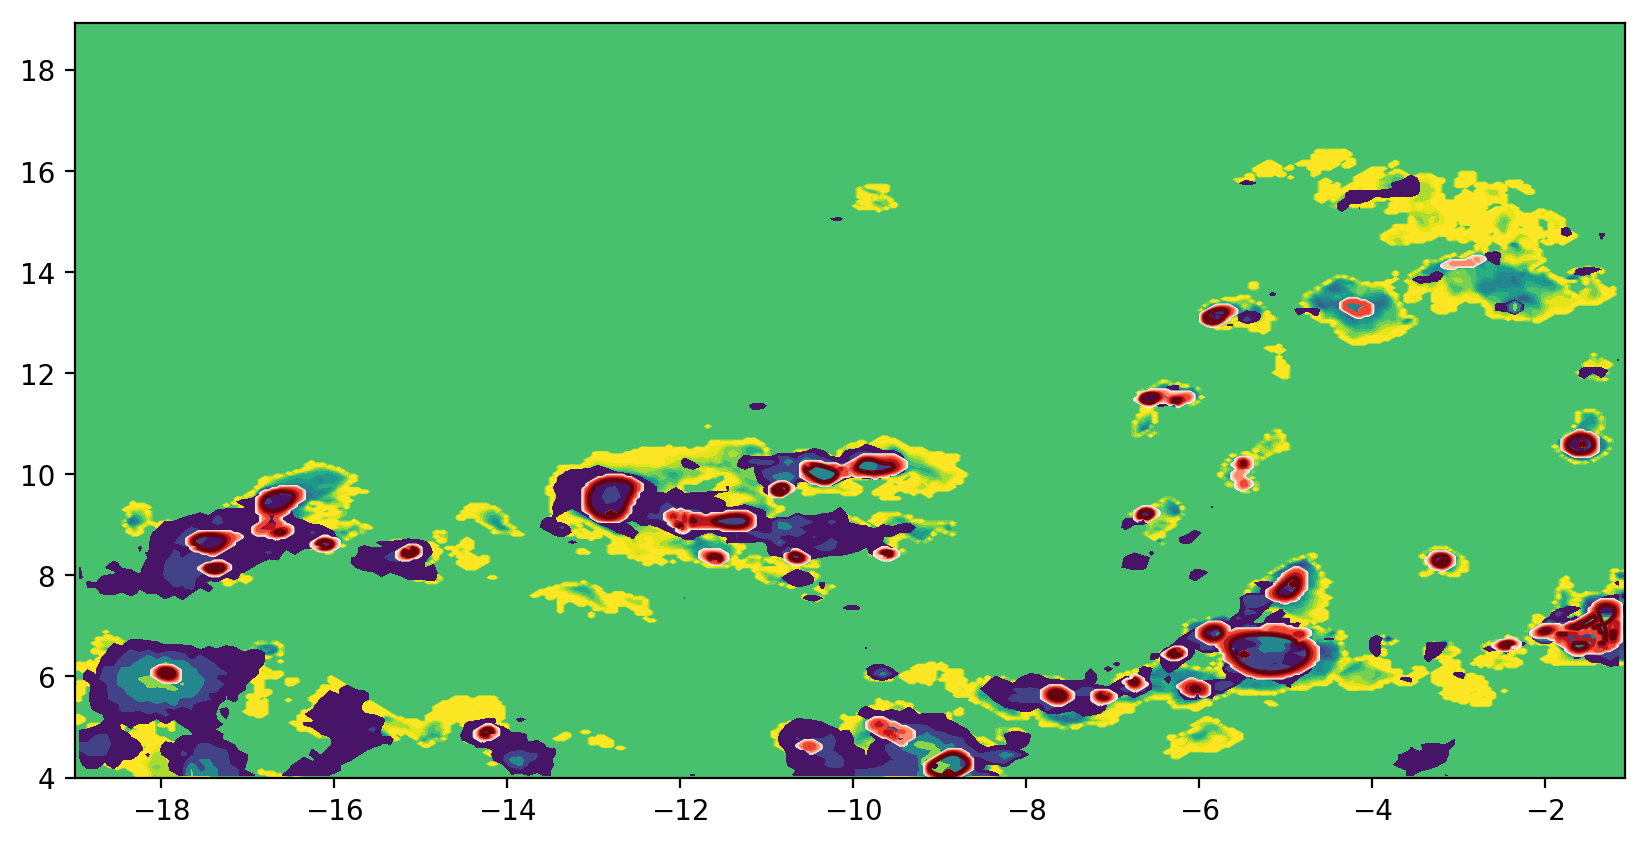

In [173]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(longitudes,latitudes,outt, levels=np.arange(-80,-55,2), extend='both')
plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20,30])
plt.contour(longitudes,latitudes, power_msg, cmap='Reds', levels=[0,1,5,10,20,30,40,50])

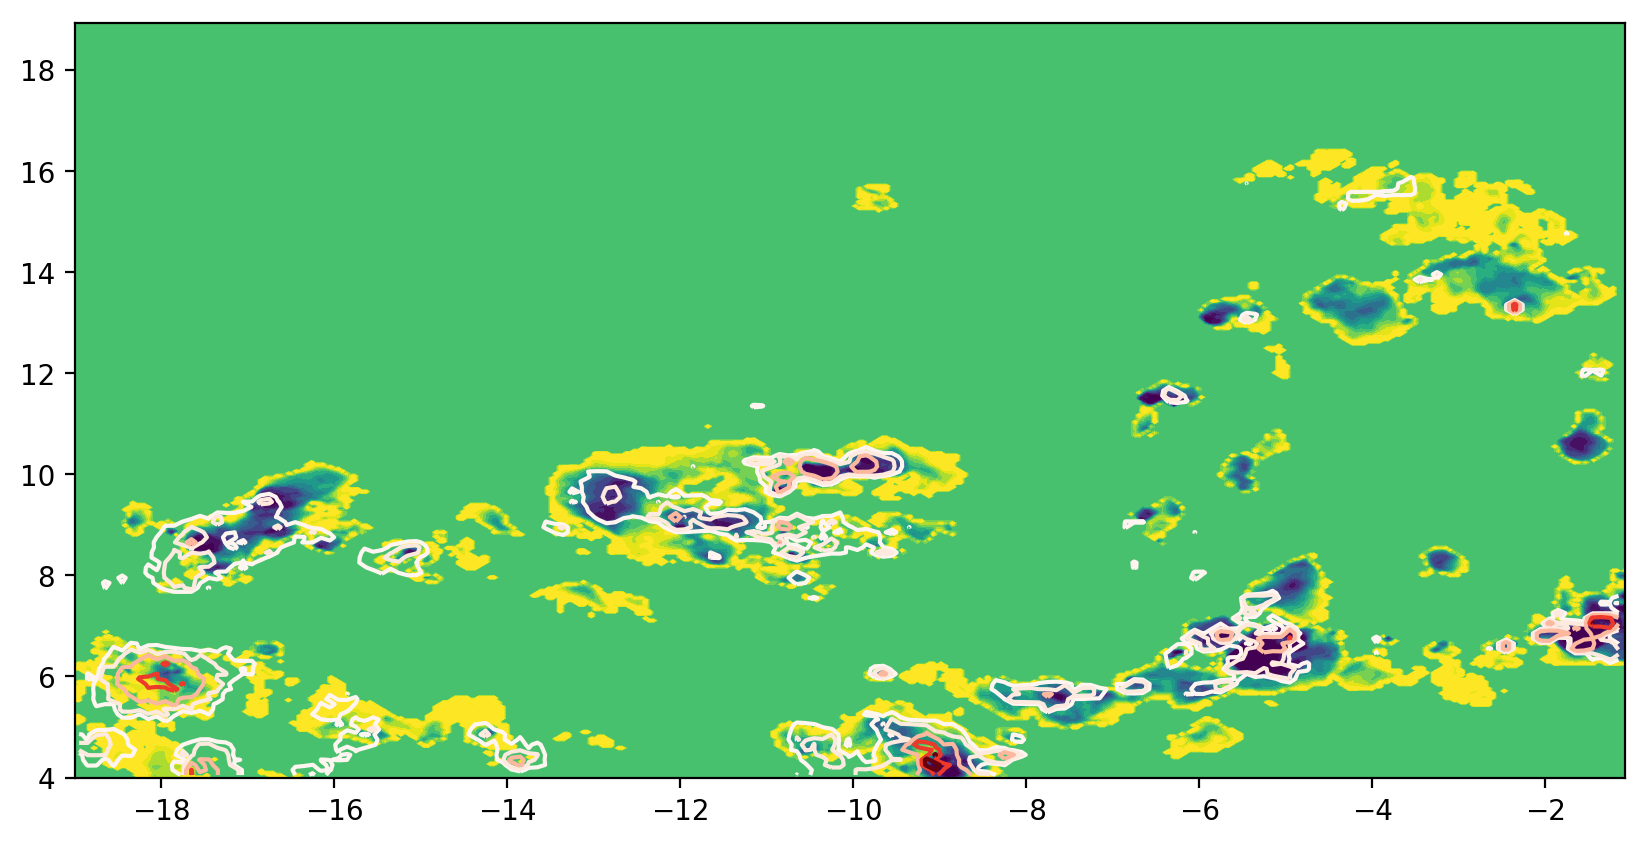

In [174]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(longitudes,latitudes, outt, levels=np.arange(-80,-55,2), extend='both')
plt.contour(pbox.lon, pbox.lat,pbox.T, cmap='Reds', levels=[3, 5,10,20,30,40,50])

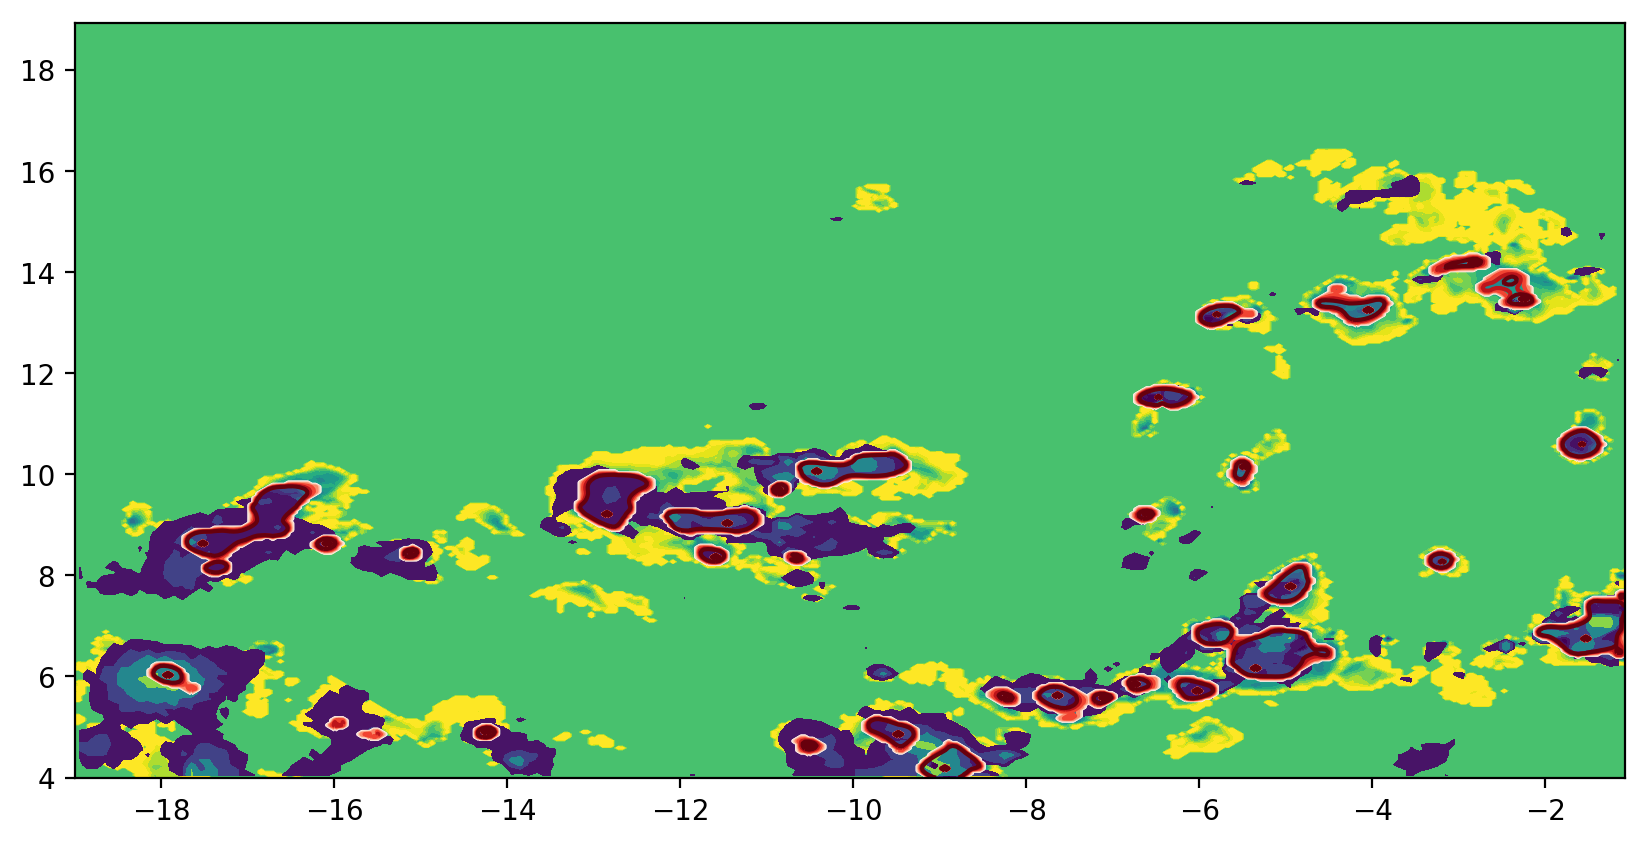

In [177]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(longitudes,latitudes,outt, levels=np.arange(-80,-55,2), extend='both')
plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20,30])
plt.contour(longitudes,latitudes, tstep_old['power'].values, cmap='Reds', levels=[0,1,5,10,20,30,40,50])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 36., 39.,
        29., 23., 54., 49., 48., 46., 42., 45., 30., 24., 15., 13., 17.,
        36., 20., 32., 25., 32., 33., 22., 29., 28., 24., 23., 19., 23.,
        11., 20., 12., 12., 18., 11., 15., 15., 12., 20., 16., 21., 13.,
        17., 18., 18., 24., 12., 15., 27., 15., 20., 18., 17., 26., 14.,
        21., 16., 27., 28., 19., 29., 28., 14., 22., 20., 10., 10., 12.,
        13.,  7.,  8., 17., 17., 13.,  6., 13., 11., 12., 11.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 89 Patch objects>)

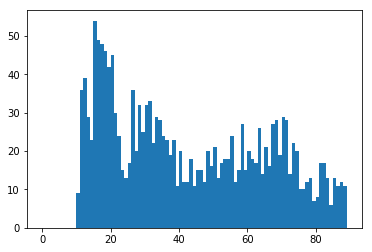

In [178]:
inputs = wav['power'].sum(axis=0)
inputs[inputs<=1] = np.nan
logn = inputs
plt.hist(logn[np.isfinite(logn)], bins=np.arange(0,90,1))

In [179]:
meteosat_data = tstep_old['BT'].copy().values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [180]:
date

<xarray.DataArray 'time' ()>
array('2020-05-03T18:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-05-03T18:00:00

In [181]:
date = [pd.datetime(date['time.year'], date['time.month'], date['time.day'], date['time.hour'], date['time.minute'])]

In [182]:
data = run_powerBlobs.wavelet_analysis(meteosat_data, longitudes, latitudes, date, savefile, data_resolution=3)

outmin -90.2 34.92
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


In [183]:
data

<xarray.Dataset>
Dimensions:  (lat: 339, lon: 400, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-03T18:00:00
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079
Data variables:
    power    (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    BT       (time, lat, lon) int16 -3379 -2307 -1914 -2225 ... -1614 -1457 44
Attributes:
    radii:              [ 2  2  4  6  9 13 19]
    scales_rounded:     [ 12  18  26  38  55  81 118]
    scales_original:    [ 12.          17.56902835  25.7225631   37.6600367  ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [184]:
#newtest = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [185]:
#data = xr.open_dataset(newtest).load()#.sel(lat=slice(6,8), lon=slice(6,9.5))
tstep = data.squeeze()

In [186]:
tstep['BT']

<xarray.DataArray 'BT' (lat: 339, lon: 400)>
array([[-3379, -2307, -1914, ..., -1945, -1450, -1447],
       [-4477, -3775, -3831, ..., -3404, -2887, -2474],
       [-4438, -4034, -4626, ..., -4688, -4047, -3389],
       ...,
       [ 1644,  1714,  1795, ...,  -609,  -141,  -565],
       [ 1623,  1696,  1752, ..., -1158,  -902,  -214],
       [ 1616,  1707,  1730, ..., -1614, -1457,    44]], dtype=int16)
Coordinates:
    time     datetime64[ns] 2020-05-03T18:00:00
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079

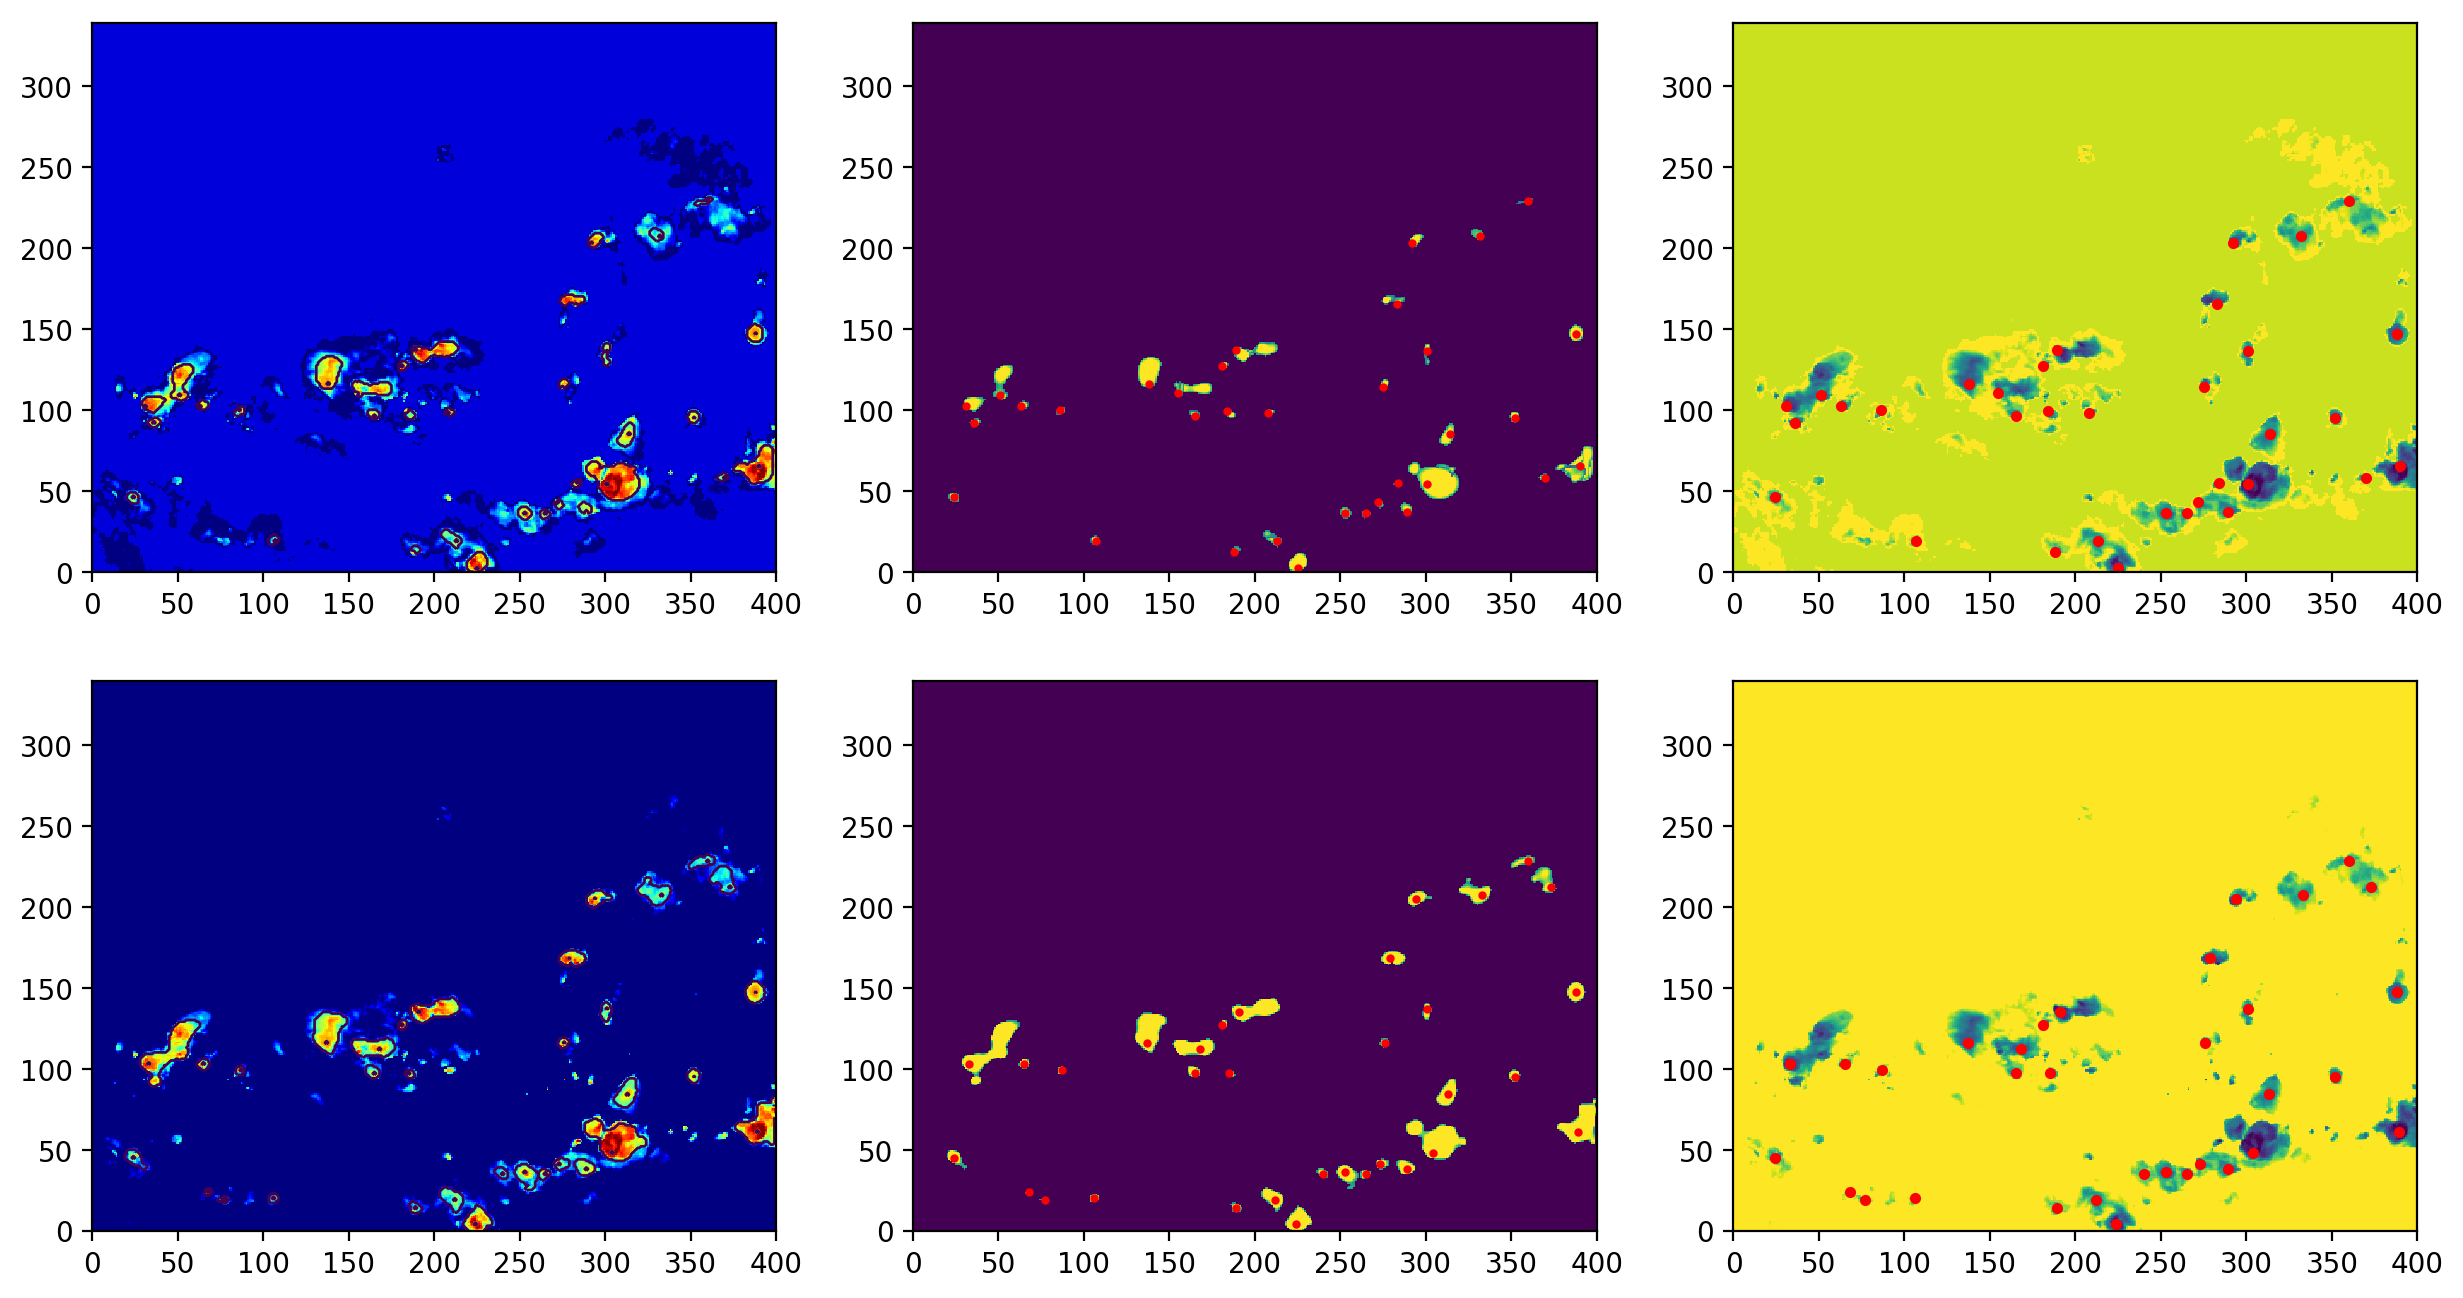

In [189]:
lon, lat = np.meshgrid(tstep['lon'], tstep['lat'])

f = plt.figure(figsize=(15,8), dpi=200)
f.add_subplot(231)
plt.pcolormesh(outt, vmin=-85, vmax=-60, cmap='jet_r')
plt.contour(power_msg, levels=[-5,0], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(power_msg<-100)

f.add_subplot(232)
plt.pcolormesh(power_msg, vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(233)
plt.pcolormesh(outt, vmax=-60, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
####################    

f.add_subplot(234)
plt.pcolormesh(tstep_old['BT']/100, vmin=-85, vmax=-60, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[-5,0], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(235)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(236)
plt.pcolormesh(tstep_old['BT']/100, vmax=-60, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
#f.savefig('/home/ck/DIR/cornkle/data/test/new_cores'+tag+'.png')

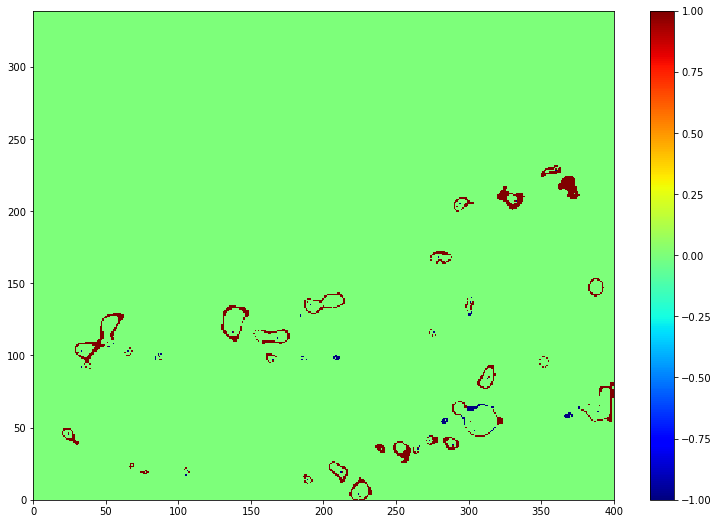

In [190]:
old_mask = np.array(tstep_old['power'].values > 0, dtype=int)
new_mask = np.array(power_msg > 0, dtype=int)
plt.figure(figsize=(13,9))
plt.pcolormesh(old_mask-new_mask, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()